In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('sensor_data_finall.csv', parse_dates=['timestamp'])

In [5]:
df.head()  

,timestamp,sensor_id,temperature,humidity,air_quality,anomaly
0,2025-12-03 09:00:00,1,35.000000,64.756497,100.0,True
1,2025-12-03 09:01:00,1,25.568682,39.527304,55.0,False
2,2025-12-03 09:02:00,1,28.006365,57.547987,71.0,False
3,2025-12-03 09:03:00,1,27.201326,65.156210,54.0,False
4,2025-12-03 09:04:00,1,22.343688,43.975804,65.0,False


In [6]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    4320 non-null   datetime64[ns]
 1   sensor_id    4320 non-null   int64         
 2   temperature  4104 non-null   float64       
 3   humidity     4104 non-null   float64       
 4   air_quality  4104 non-null   float64       
 5   anomaly      4320 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1)
memory usage: 173.1 KB


,timestamp,sensor_id,temperature,humidity,air_quality
count,4320,4320.000000,4104.000000,4104.000000,4104.000000
mean,2025-12-03 20:59:30.000000256,2.000000,25.497265,50.773556,73.318470
min,2025-12-03 09:00:00,1.000000,20.001474,30.002080,50.000000
25%,2025-12-03 14:59:45,1.000000,22.578997,40.160281,60.000000
50%,2025-12-03 20:59:30,2.000000,25.108466,50.381849,70.000000
75%,2025-12-04 02:59:15,3.000000,27.726927,60.560133,81.000000
max,2025-12-04 08:59:00,3.000000,49.924779,99.850197,299.000000
std,NaN,0.816591,4.021603,12.972690,26.763772


In [7]:
df.sample(10)

,timestamp,sensor_id,temperature,humidity,air_quality,anomaly
1562,2025-12-03 11:02:00,2,25.246844,68.061148,52.0,False
1846,2025-12-03 15:46:00,2,29.068244,36.347715,NaN,False
35,2025-12-03 09:35:00,1,27.284813,54.245960,81.0,False
2660,2025-12-04 05:20:00,2,23.902665,52.047659,75.0,False
2422,2025-12-04 01:22:00,2,21.052657,32.117106,64.0,False
543,2025-12-03 18:03:00,1,26.417292,64.924550,60.0,False
2366,2025-12-04 00:26:00,2,NaN,NaN,85.0,False
686,2025-12-03 20:26:00,1,23.760079,49.902446,69.0,False
3158,2025-12-03 13:38:00,3,26.681322,61.550687,51.0,False
2830,2025-12-04 08:10:00,2,24.746022,59.450184,59.0,False


In [8]:
#Convert numeric columns to proper type
# This ensures any invalid strings are converted to NaN
# -----------------------------


In [9]:
df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')
df['humidity'] = pd.to_numeric(df['humidity'], errors='coerce')
df['air_quality'] = pd.to_numeric(df['air_quality'], errors='coerce')

In [10]:
print(df.isna().sum())

timestamp        0
sensor_id        0
temperature    216
humidity       216
air_quality    216
anomaly          0
dtype: int64


In [11]:
# Forward-fill missing values safely////////It replaces NaN (missing) values with the last known valid observation


In [12]:

df['temperature'] = df['temperature'].ffill()
df['humidity'] = df['humidity'].ffill()
df['air_quality'] = df['air_quality'].ffill()

In [13]:
print(df.isna().sum())

timestamp      0
sensor_id      0
temperature    0
humidity       0
air_quality    0
anomaly        0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    4320 non-null   datetime64[ns]
 1   sensor_id    4320 non-null   int64         
 2   temperature  4320 non-null   float64       
 3   humidity     4320 non-null   float64       
 4   air_quality  4320 non-null   float64       
 5   anomaly      4320 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1)
memory usage: 173.1 KB


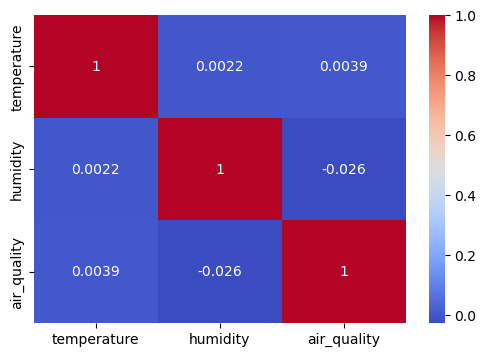

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(df[['temperature', 'humidity', 'air_quality']].corr(), annot=True, cmap='coolwarm')
plt.show()


In [16]:
df[['temperature','humidity','air_quality','anomaly']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  4320 non-null   float64
 1   humidity     4320 non-null   float64
 2   air_quality  4320 non-null   float64
 3   anomaly      4320 non-null   bool   
dtypes: bool(1), float64(3)
memory usage: 105.6 KB


In [17]:
df["anomaly"].value_counts(normalize=True) * 100


anomaly
False    92.569444
True      7.430556
Name: proportion, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

                                                                                                                               # Prepare X and y
X = df[['temperature', 'humidity', 'air_quality']]
y = df['anomaly']

                                                                                                                                    # SPLIT FIRST
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y                                                                                                             # Keep same anomaly ratio
)

                                                                                                                            # SCALE AFTER SPLITTING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)                                                                          # Learn from train only
X_test_scaled = scaler.transform(X_test_raw)                                                                                # Apply to test

print(f"✅ Split complete:")
print(f"   Training samples: {len(X_train_scaled)}")
print(f"   Testing samples: {len(X_test_scaled)}")

✅ Split complete:
   Training samples: 3024
   Testing samples: 1296


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib  

model = RandomForestClassifier(
    n_estimators=200, 
    random_state=42,
    class_weight='balanced',
    n_jobs=-1                                                                                                # Use all CPU cores for faster training
)

                                                                                                                 # Use the SCALED training data 
model.fit(X_train_scaled, y_train)

                                                                                                                     # Predict on SCALED test data
y_pred = model.predict(X_test_scaled)



In [20]:


                                                                                                              # SAVE BOTH model AND scaler
joblib.dump(model, 'anomaly_model_final.pkl')
joblib.dump(scaler, 'scaler_final.pkl')                                                                       # Save the scaler 

print("✅ Model trained and saved!")
print("   Model: anomaly_model_final.pkl")
print("   Scaler: scaler_final.pkl")

✅ Model trained and saved!
   Model: anomaly_model_final.pkl
   Scaler: scaler_final.pkl


In [21]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nDetailed Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}"  )
print(f"Recall:    {recall:.4f} ")   
print(f"F1 Score:  {f1:.4f}")   


Detailed Metrics:
Accuracy:  0.9923
Precision: 0.9674
Recall:    0.9271 
F1 Score:  0.9468


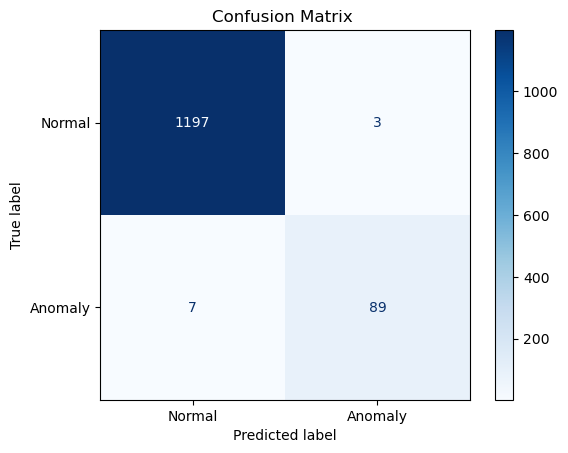

In [22]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix ")
plt.show()

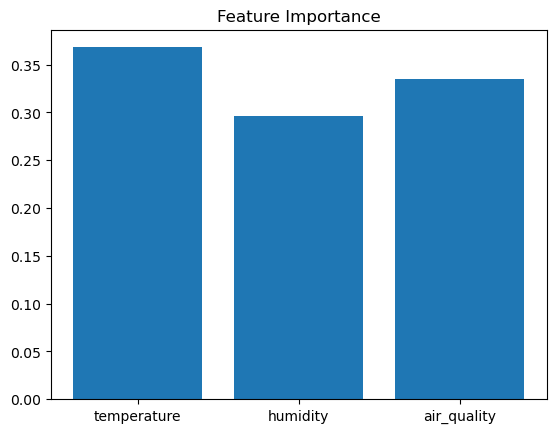

In [23]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
features = ['temperature', 'humidity', 'air_quality']

plt.bar(features, importances)
plt.title("Feature Importance")
plt.show()


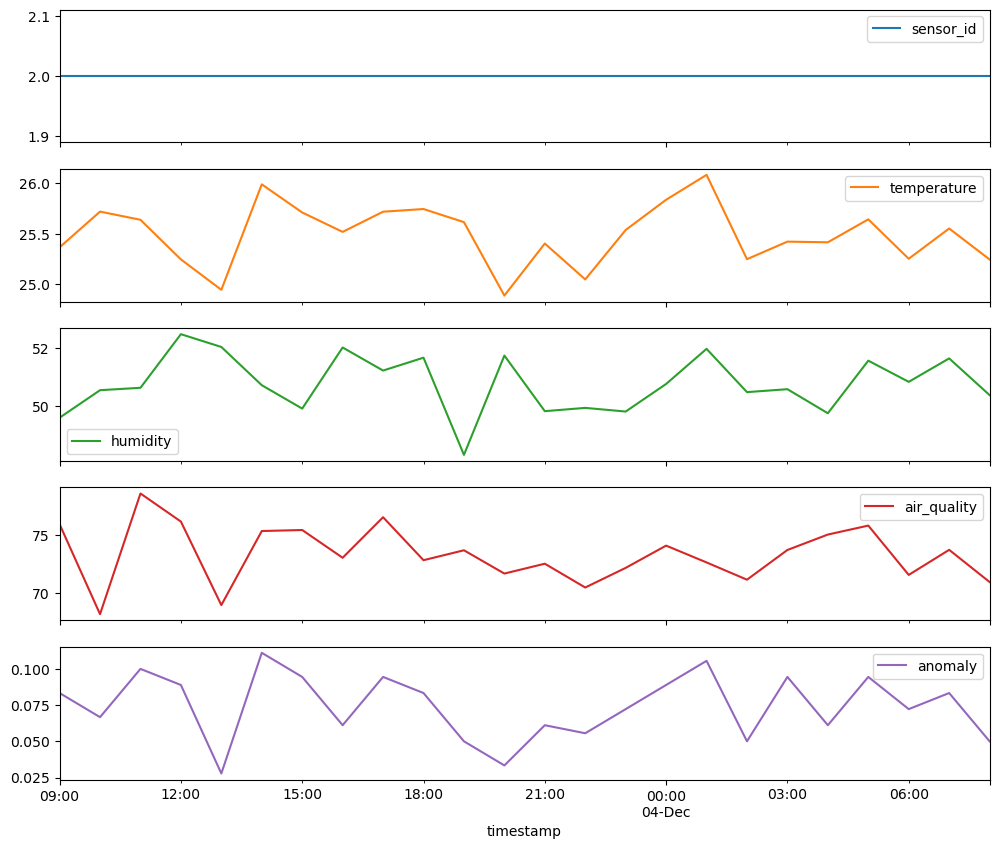

Sensor 1 Statistics:
       temperature     humidity  air_quality
count  1440.000000  1440.000000  1440.000000
mean     25.451046    50.632554    72.927778
std       4.136596    12.959104    26.448956
min      20.002789    30.015586    50.000000
25%      22.447112    39.920305    60.000000
50%      24.939841    49.986929    70.000000
75%      27.755804    60.200260    80.000000
max      49.693658    98.980993   296.000000

Anomaly rate: 0.07708333333333334
----------------------------------------
Sensor 2 Statistics:
       temperature     humidity  air_quality
count  1440.000000  1440.000000  1440.000000
mean     25.503833    51.139665    73.159028
std       4.038329    13.264301    26.115244
min      20.001474    30.002080    50.000000
25%      22.547106    40.185752    60.000000
50%      25.000073    51.416789    70.000000
75%      27.784385    61.004146    81.000000
max      48.494593    99.083311   299.000000

Anomaly rate: 0.07569444444444444
-------------------------------------

In [24]:
# Time-based patterns
df.set_index('timestamp', inplace=True)
df.resample('h').mean().plot(subplots=True, figsize=(12, 10))
plt.show()

# Sensor comparison
for sensor in df['sensor_id'].unique():
    sensor_data = df[df['sensor_id'] == sensor]
    print(f"Sensor {sensor} Statistics:")
    print(sensor_data[['temperature', 'humidity', 'air_quality']].describe())
    print("\nAnomaly rate:", sensor_data['anomaly'].mean())
    print("-" * 40)



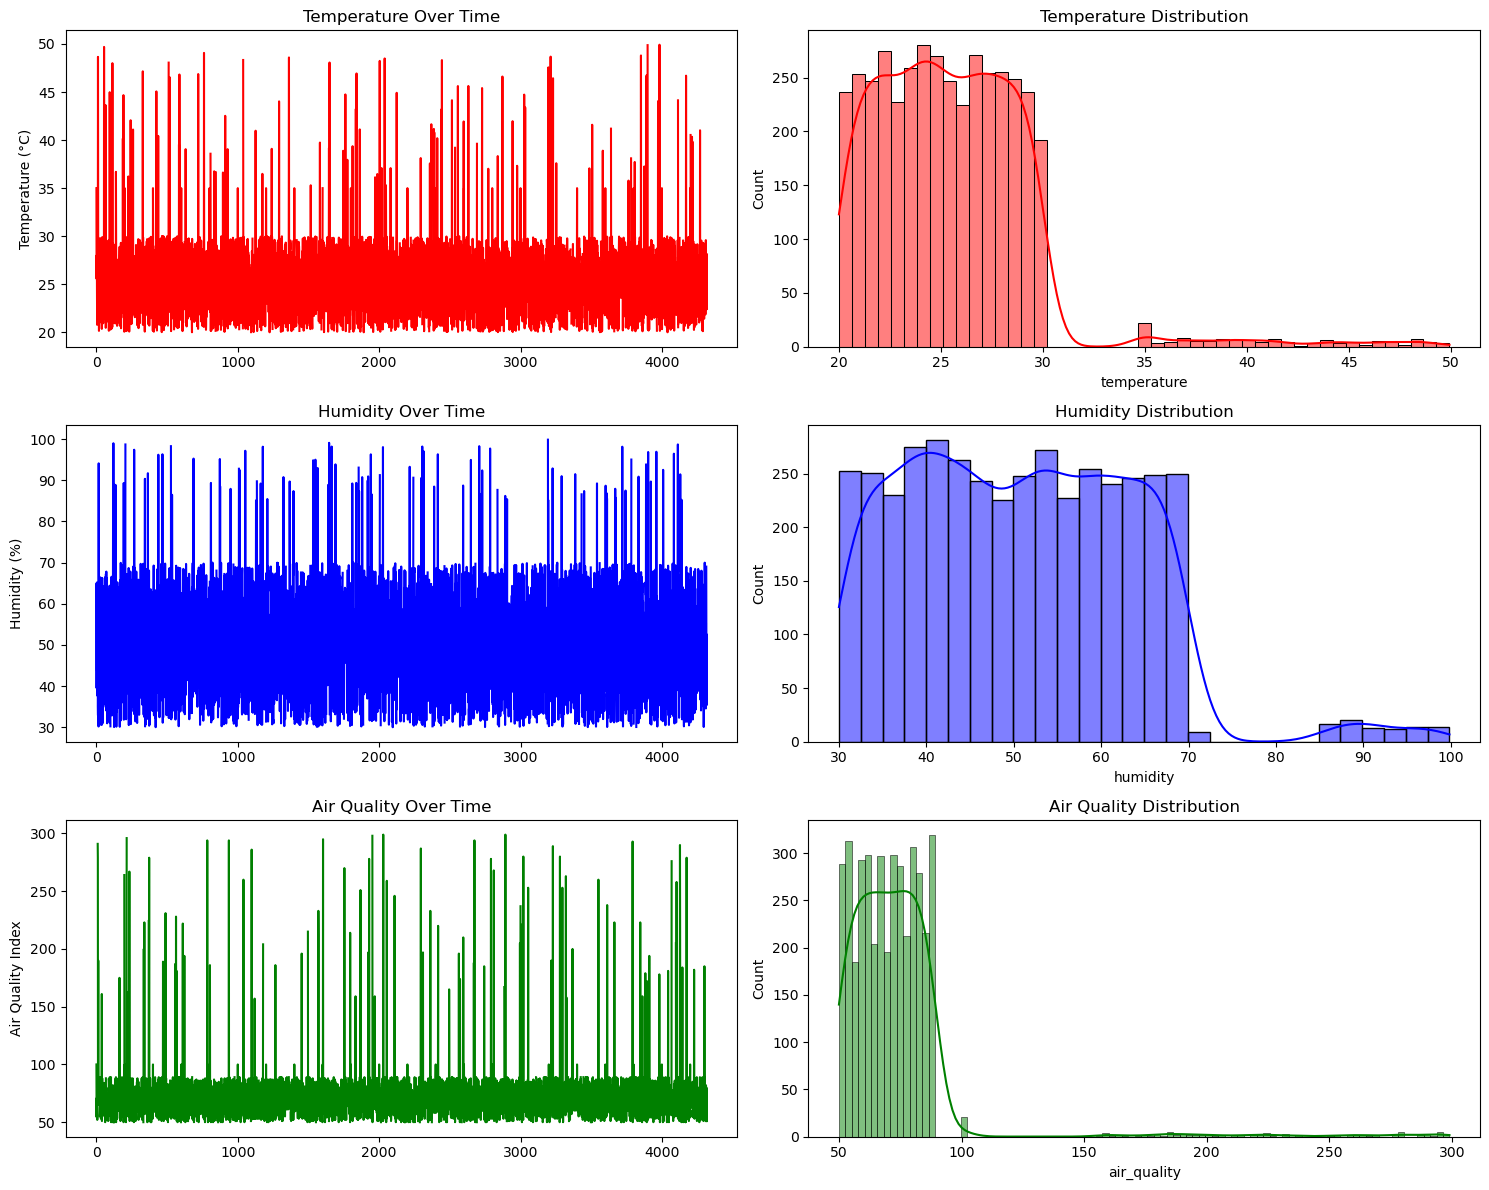

In [51]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# 1. Time series of each metric
df['temperature'].plot(ax=axes[0,0], title='Temperature Over Time', color='red')
axes[0,0].set_ylabel('Temperature (°C)')

df['humidity'].plot(ax=axes[1,0], title='Humidity Over Time', color='blue')
axes[1,0].set_ylabel('Humidity (%)')

df['air_quality'].plot(ax=axes[2,0], title='Air Quality Over Time', color='green')
axes[2,0].set_ylabel('Air Quality Index')

# 2. Distribution plots
sns.histplot(df['temperature'], ax=axes[0,1], kde=True, color='red')
axes[0,1].set_title('Temperature Distribution')

sns.histplot(df['humidity'], ax=axes[1,1], kde=True, color='blue')
axes[1,1].set_title('Humidity Distribution')

sns.histplot(df['air_quality'], ax=axes[2,1], kde=True, color='green')
axes[2,1].set_title('Air Quality Distribution')

plt.tight_layout()
plt.show()

